# Learn from linear data (plus noise)

Welcome to this notebook. This ntoebook is available at my GitHub http://ww.github.com/pauloabelha/notebooks

I made while delving deep into Machine Learning to understand things from first principles.
All code in here is of my own authorship.
Resources:
Wikipedia
David Mackay's bible was a valuable resource: http://www.inference.org.uk/mackay/itila/book.html
Another good book: http://www.gaussianprocess.org/gpml/
Yer another good book: http://www.deeplearningbook.org/

In this notebook we compare four different Machine Learning approaches for fitting a function to noisy linear data
- Linear Regression
- Bayesian Linear Regression
- Neural Networks
- Gaussian Processes


p.s.: One interestig thing would be to implement our own Gaussian distribution sampler:
    http://www.alanzucconi.com/2015/09/16/how-to-sample-from-a-gaussian-distribution/

First, we import everything and get a numpy fixed seed for reproducibility

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# for reproducibility
random_seed_ix = 1
np.random.seed(random_seed_ix)

First we define our function for generating our data according to a linear model plus Gaussian noise

In [2]:
# Generate Gaussian-noisy linear data plus
# X is (n_pts,n_dims), where n is number of examples and d is numebr of dimensions
# the bias is included in X as an extra column
# so the vector w also gets an extra element (always 1)
# y is (n_pts,1)
# currently this code is for one dimension only
def gen_Gauss_noisy_lin_data(n_pts, random_seed_ix = 1, plot_fig = 0):  
    # number of dimensions
    n_dims = 1
    # for reproducibility
    np.random.seed(random_seed_ix)
    # noise level (variance of Gaussian distribution for noise)
    noise_sigma = np.random.rand(1)*0.1
    # get X as a random matrix (with one xtra column for adding bias)
    X = np.random.rand(n_pts,n_dims+1)
    # add the bias by overwriting the extra column of X
    b = np.random.randn()
    X[:,-1] = b
    # ensure w has only positive values (for more intuitive visualisation from left to right)
    w = abs(np.random.randn(n_dims+1,1))
    w[-1] = 1
    # get the normally distributed vector
    noise = np.random.normal(0,noise_sigma,(n_pts,1))
    y = np.dot(X,w) + noise
    assert(y.shape[0] == n_pts)
    assert(y.shape[1] == 1)
    if plot_fig:
        plt.scatter(X[:,-2], y)
        plt.show()
    return (X, y, w, noise)

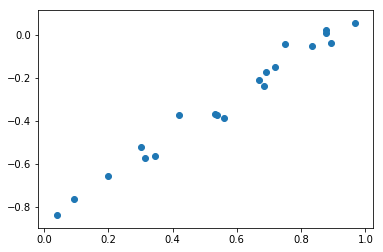

X_train shape = (20, 2)
y_train shape = (20, 1)
w shape = (2, 1)
noise shape = (20, 1)
Real w = [[ 0.96082]]
Real b = -0.850052377193


In [3]:
X_train, y_train, w, noise = gen_Gauss_noisy_lin_data(20,random_seed_ix,True)
print("X_train shape = " + str(X_train.shape))
print("y_train shape = " + str(y_train.shape))
print("w shape = " + str(w.shape))
print("noise shape = " + str(noise.shape))
print("Real w = " + str(w[0:-1]))
print("Real b = " + str(X_train[1,-1]))

Now we perform Linear Regression

In [4]:
# mean squared error for our linear model
def my_mse(y_hat,y):
    m = y_hat.shape[1]
    mse = (1/m)*np.sum(np.power(y_hat-y,2))
    return mse    

In [5]:
# perform linear regression using mean squared error
# http://www.deeplearningbook.org/contents/ml.html (Section 5.1.4)
def linear_regression(X_train,y_train):
    assert(X_train.shape[0] == y_train.shape[0])
    a = np.linalg.inv(np.dot(X_train.T,X_train))
    b = np.dot(a,X_train.T)
    w_pred = np.dot(b,y_train)    
    y_pred = np.dot(X_train,w_pred)
    assert(y_pred.shape == y_train.shape)
    mse = my_mse(y_train,y_pred)
    return w_pred, y_pred, mse

Predicted w = [[ 0.96828362]]
Real w = [[ 0.96082]]
Predicted b = [ 1.01152432]
Real b = [ 1.]
Mean squared error = 0.0298073344443


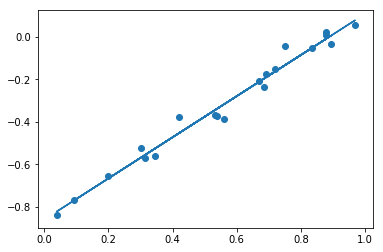

In [6]:
w_pred, y_pred, mse = linear_regression(X_train,y_train)
print("Predicted w = " + str(w_pred[0:-1]))
print("Real w = " + str(w[0:-1]))
print("Predicted b = " + str(w_pred[-1]))
print("Real b = " + str(w[-1]))
print("Mean squared error = " + str(mse))

plt.plot(X_train[:,0:-1],y_pred)
plt.scatter(X_train[:,-2], y_train)
plt.show()